<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/Ara_Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/2017"
files = list()

In [4]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        

In [5]:
len_files = len(files)

In [ ]:
len_under_10 = 0
len_over_130 = 0

for i in range(len_files):
  df = pd.read_csv(files[i])
  if df["1"].min() < 10:
    len_under_10 += 1
  if df["1"].max() > 130:
    len_over_130 += 1
  print("over 130: ", len_over_130)
  print("i: ",i)
  

In [13]:
len_over_130

886

In [14]:
len_under_10

1656

In [15]:
frequency_over_130 = (len_over_130/len_files)*100
frequency_under_10 = (len_under_10/len_files)*100

In [16]:
frequency_over_130

53.5024154589372

In [20]:
frequency_under_10

100.0

In [45]:
df = pd.read_csv(files[1])

In [64]:
type(df["1"].min())

float

In [26]:
len_file = len(df)

In [55]:
file_info = pd.DataFrame(columns=["under_10","over_130","freq_under_10","freq_over_130"])

In [56]:
file_info

,under_10,over_130,freq_under_10,freq_over_130


In [ ]:
for i in range(len_files):
  df = pd.read_csv(files[i]) 
  file_info.loc[files[i]] = [df["1"].min() < 10,
                        df["1"].max() > 130,
                        len(df["1"][df["1"] < 10]) / len_file,
                        len(df["1"][df["1"] > 130]) / len_file]
  
  print("i: ",i)

In [67]:
file_info.describe()

,freq_under_10,freq_over_130
count,1656.000000,1656.000000
mean,0.137683,0.001307
std,0.158675,0.007115
min,0.031849,0.000000
25%,0.036116,0.000000
50%,0.072950,0.000010
75%,0.177616,0.000314
max,1.000000,0.122479


In [71]:
file_info.sort_values("freq_under_10",ascending=False)

,under_10,over_130,freq_under_10,freq_over_130
drive/MyDrive/2017/926_1_2017.csv,True,False,1.000000,0.000000
drive/MyDrive/2017/929_0_2017.csv,True,False,1.000000,0.000000
drive/MyDrive/2017/926_0_2017.csv,True,False,1.000000,0.000000
drive/MyDrive/2017/928_0_2017.csv,True,False,1.000000,0.000000
drive/MyDrive/2017/921_1_2017.csv,True,False,1.000000,0.000000
...,...,...,...,...
drive/MyDrive/2017/467_1_2017.csv,True,False,0.031963,0.000000
drive/MyDrive/2017/329_1_2017.csv,True,True,0.031954,0.000010
drive/MyDrive/2017/328_1_2017.csv,True,True,0.031859,0.000010
drive/MyDrive/2017/255_1_2017.csv,True,False,0.031849,0.000000


In [32]:
import seaborn as sns

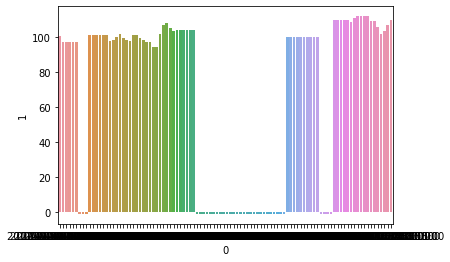

In [35]:
sns.barplot(x=df["0"][:100],y=df["1"][:100])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


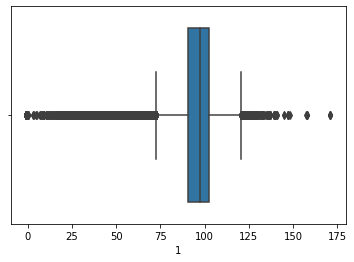

In [37]:
sns.boxplot(df["1"])

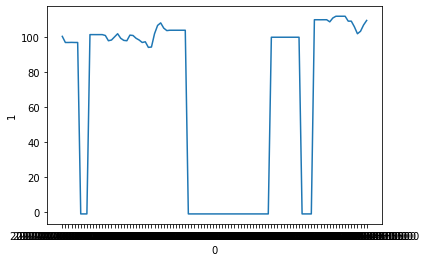

In [41]:
sns.lineplot(y=df["1"][:100],x=df["0"][:100])